In [6]:
using Random
using Distributions
using Plots

Random.seed!(1234);
gr();

In [7]:
include("../feature/feature.jl");
include("../linear/linear.jl");

In [8]:
function create_toy_data(func, sample_size, std)
    x = collect(reshape(range(0, stop=1.0, length=sample_size),sample_size));
    noise = rand(Normal(0.0, std), sample_size);
    return x, func(x) + noise
end

function sinusoidal(x)
    return sin.(2 * pi * x)
end

sinusoidal (generic function with 1 method)

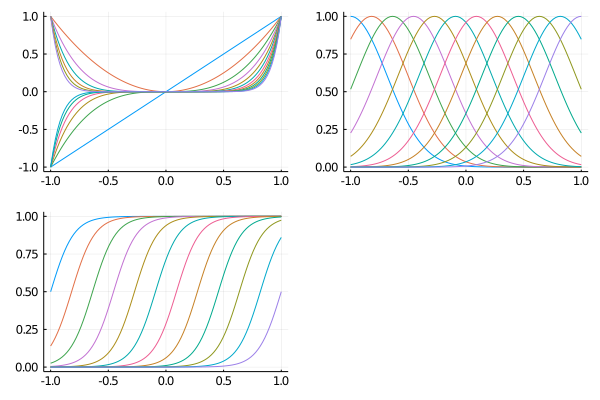

In [9]:
x = collect(reshape(range(-1.0, stop=1.0, length=100), 100));
means = collect(reshape(range(-1.0, stop=1.0, length=12), 12));
feature_poly = PolynomialFeature(11);
feature_gauss = GaussianFeature(means, 0.1);
feature_sigmoid = SigmoidalFeature(means, 10.0);

X_polynomial = transform(feature_poly, x);
X_gaussian = transform(feature_gauss, x);
X_sigmoidal = transform(feature_sigmoid, x);

plots = [];
# polynomial
p = plot();
for j in 1:12
    p = plot!(x, X_polynomial[j, :]);
end
push!(plots, p);
# gaussian
p = plot();
for j in 1:12
    p = plot!(x, X_gaussian[j, :]);
end
push!(plots, p);
# sigmoidal
p = plot();
for j in 1:12
    p = plot!(x, X_sigmoidal[j, :]);
end
push!(plots, p);

plot(plots[1], plots[2], plots[3], legend=nothing)

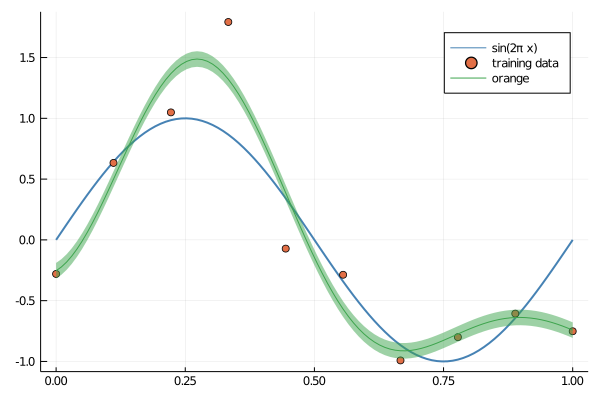

In [11]:
x_train, y_train = create_toy_data(sinusoidal, 10, 0.5);
x_test = collect(reshape(range(0, stop=1.0, length=100), 100));
y_test = sinusoidal(x_test);

means = collect(reshape(range(0, stop=1.0, length=8), 8));
feature = GaussianFeature(means, 0.1);

X_train = transform(feature, x_train);
X_test = transform(feature, x_test);
model = LinearRegressor([0], 0);
fitting(model, X_train, y_train);

y, var = predict(model, X_test, true);
y_std = fill(var, size(y)[1]);

plot(x_test, y_test, label="sin(2π x)", color="steelblue", lw=2);
plot!(x_train, y_train, label="training data", seriestype=:scatter);
plot!(x_test, y, ribbon=(y_std, y_std), fillalpha=0.5, label="orange")

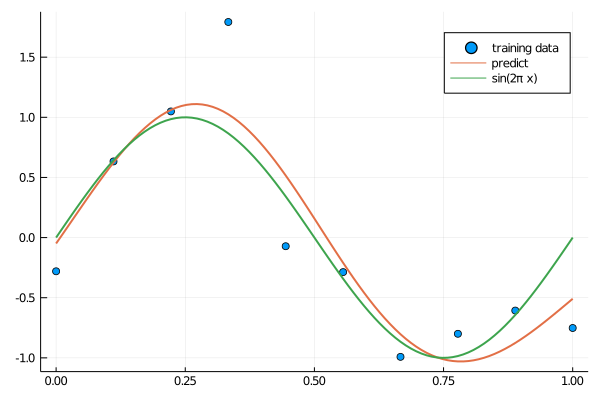

In [24]:
model = RidgeRegressor([0.0], 1e-2);
fitting(model, X_train, y_train);
y = predict(model, X_test);

plot(x_train, y_train, label="training data", seriestype=:scatter);
plot!(x_test, y, label="predict", lw=2)
plot!(x_test, y_test, label="sin(2π x)", lw=2)